In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib
%matplotlib widget
import jmkfigure
import xmitgcm


In [2]:
!mkdir Movie07
!rm Movie07/*

zsh:1: no matches found: Movie07/*


In [8]:
taumax = 0.225  # N/m^2
t = np.arange(407*1.0)  # hours
taut = 0 * t
taut[t<=24] = np.arange(25) / 24 * taumax
taut[(t>24) & (t<(5*24))] = taumax
taut[(t>=5*24) & (t<6*24)] = np.arange(23, -1, -1) / 24 * taumax


/Users/jklymak/anaconda3/envs/ButeWind/lib/python3.10/site-packages/xmitgcm/mds_store.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':


<xarray.Dataset>
Dimensions:  (XC: 1280, XG: 1280, Z: 100, Zp1: 101, Zu: 100, Zl: 100, time: 120)
Coordinates: (12/36)
  * XC       (XC) float64 50.0 150.0 250.0 ... 3.604e+05 3.726e+05 3.855e+05
    YC       float64 50.0
  * XG       (XG) float64 -1.819e-12 100.0 200.0 ... 3.664e+05 3.789e+05
    YG       float64 0.0
  * Z        (Z) float64 -0.5 -1.514 -2.555 -3.625 ... -469.6 -483.4 -497.6
  * Zp1      (Zp1) float64 0.0 -1.0 -2.027 -3.083 ... -476.4 -490.4 -504.8
    ...       ...
    rSurfC   (XC) float64 dask.array<chunksize=(1280,), meta=np.ndarray>
    rLowC    (XC) float64 dask.array<chunksize=(1280,), meta=np.ndarray>
    rLowW    (XG) float64 dask.array<chunksize=(1280,), meta=np.ndarray>
    rSurfW   (XG) float64 dask.array<chunksize=(1280,), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 00:00:00 01:00:00 ... 4 days 23:00:00
Data variables:
    ETAN     (time, XC) float64 dask.array<chunksize=(1, 12

NameError: name 'taut' is not defined

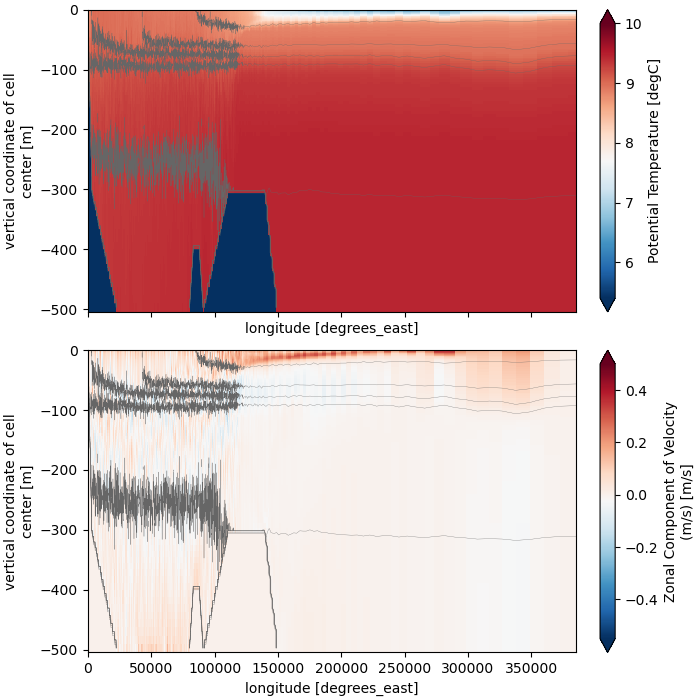

In [3]:
with xmitgcm.open_mdsdataset('../results/Bute07/input/', endian='<', iters=np.arange(0*3600, 120*3600, 3600)) as ds0:
    ds0=ds0.isel(YC=0, YG=0)
    print(ds0)
    
    for i in range(119, 120):
        ds = ds0.isel(time=i)
        ds['pden'] = ds.THETA * -0.2 + ds.SALT * 0.75
        
        fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, constrained_layout=True, figsize=(7, 7))
        
        ds.THETA.plot.pcolormesh(ax=ax[0], vmin=2+8, vmax=-2+8, cmap='RdBu_r')
        ds.pden.plot.contour(ax=ax[0], levels=np.array([10, 15, 20, 20.5, 20.75, 21, 21.25]), linewidths=0.2, colors='0.4')
                                           # levels=np.array([15, 20, 25, 26, 27, 28, 29, 29.25, 29.5, 29.75, 30, 30.05, 30.1, 30.2, 30.3]))


        ds.UVEL.plot.pcolormesh(ax=ax[1], vmin=0.5, vmax=-0.5, cmap='RdBu_r')

        ds.pden.plot.contour(ax=ax[1], levels=np.array([10, 15, 20, 20.5, 20.75, 21, 21.25]),linewidths=0.2, colors='0.4')
                                           # levels=np.array([15, 20, 25, 26, 27, 28, 29, 29.25, 29.5, 29.75, 30, 30.05, 30.1, 30.2, 30.3]))

        ax[1].set_title('')

        ax[0].set_title('')

        ax[0].set_title(f'{i:4d} [h]: $\\tau = {taut[i]:2.2f}$', loc='left')
#        ax[0].set_xlim([-100, 75000])

        ax[0].set_ylim([-210, 0])
        #fig.savefig(f'Movie07/frame{i:04d}.png')
    

In [6]:
matplotlib.use('agg')
with xmitgcm.open_mdsdataset('../results/Bute07/input/', endian='<', iters=np.arange(0, 10*3600, 3600)) as ds0:
    ds0=ds0.isel(YC=0, YG=0)
    print(ds0)
    
    for i in range(3,4):
        ds = ds0.isel(time=i)
        ds['pden'] = ds.THETA * -0.2 + ds.SALT * 0.75
        
        fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, constrained_layout=True, figsize=(7, 7))
        
        ds.THETA.plot.pcolormesh(ax=ax[0], vmin=2+8, vmax=-2+8, cmap='RdBu_r')
        ds.pden.plot.contour(ax=ax[0], levels=np.array([10, 15, 20, 20.5, 20.75, 21, 21.25]), linewidths=0.2, colors='0.4')
                                           # levels=np.array([15, 20, 25, 26, 27, 28, 29, 29.25, 29.5, 29.75, 30, 30.05, 30.1, 30.2, 30.3]))


        ds.UVEL.plot.pcolormesh(ax=ax[1], vmin=0.5, vmax=-0.5, cmap='RdBu_r')

        ds.pden.plot.contour(ax=ax[1], levels=np.array([10, 15, 20, 20.5, 20.75, 21, 21.25]),linewidths=0.2, colors='0.4')
                                           # levels=np.array([15, 20, 25, 26, 27, 28, 29, 29.25, 29.5, 29.75, 30, 30.05, 30.1, 30.2, 30.3]))

        ax[1].set_title('')

        ax[0].set_title('')

        ax[0].set_title(f'{i:4d} [h]: $\\tau = {taut[i]:2.2f}$', loc='left')
        #ax[0].set_xlim([-100, 75000])

        ax[0].set_ylim([-210, 0])
        fig.savefig(f'Movie07/frame{i:04d}.png')
    

/Users/jklymak/anaconda3/envs/ButeWind/lib/python3.10/site-packages/xmitgcm/mds_store.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':


<xarray.Dataset>
Dimensions:  (XC: 1280, XG: 1280, Z: 100, Zp1: 101, Zu: 100, Zl: 100, time: 10)
Coordinates: (12/36)
  * XC       (XC) float64 50.0 150.0 250.0 ... 3.604e+05 3.726e+05 3.855e+05
    YC       float64 50.0
  * XG       (XG) float64 -1.819e-12 100.0 200.0 ... 3.664e+05 3.789e+05
    YG       float64 0.0
  * Z        (Z) float64 -0.5 -1.514 -2.555 -3.625 ... -469.6 -483.4 -497.6
  * Zp1      (Zp1) float64 0.0 -1.0 -2.027 -3.083 ... -476.4 -490.4 -504.8
    ...       ...
    rSurfC   (XC) float64 dask.array<chunksize=(1280,), meta=np.ndarray>
    rLowC    (XC) float64 dask.array<chunksize=(1280,), meta=np.ndarray>
    rLowW    (XG) float64 dask.array<chunksize=(1280,), meta=np.ndarray>
    rSurfW   (XG) float64 dask.array<chunksize=(1280,), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 00:00:00 01:00:00 ... 08:00:00 09:00:00
Data variables:
    UVEL     (time, Z, XG) float64 dask.array<chunksize=(1

In [15]:
!mkdir Movie04
matplotlib.use('agg')
ds0 = xmitgcm.open_mdsdataset('../results/Bute04/input/', endian='<', iters=np.arange(0, 1207800, 3600))
ds0=ds0.isel(YC=0, YG=0)
print(ds0)
for i in range(len(ds0.time)):
    print(i)
    ds = ds0.isel(time=i)
    ds['pden'] = ds.THETA * -0.2 + ds.SALT * 0.75

    fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, constrained_layout=True, figsize=(7, 7))

    ds.THETA.plot.pcolormesh(ax=ax[0], vmin=7, vmax=10, cmap='RdBu_r')
    ds.pden.plot.contour(ax=ax[0], levels=np.array([10, 15, 20, 20.5, 20.75, 21, 21.25]), linewidths=0.2, colors='0.4')
                                       # levels=np.array([15, 20, 25, 26, 27, 28, 29, 29.25, 29.5, 29.75, 30, 30.05, 30.1, 30.2, 30.3]))


    ds.UVEL.plot.pcolormesh(ax=ax[1], vmin=0.5, vmax=-0.5, cmap='RdBu_r')

    ds.pden.plot.contour(ax=ax[1], levels=np.array([10, 15, 20, 20.5, 20.75, 21, 21.25]),linewidths=0.2, colors='0.4')
                                       # levels=np.array([15, 20, 25, 26, 27, 28, 29, 29.25, 29.5, 29.75, 30, 30.05, 30.1, 30.2, 30.3]))

    ax[1].set_title('')

    ax[0].set_title('')

    ax[0].set_title(f'{i:4d} [h]: $\\tau = {taut[i]:2.2f}$', loc='left')
    ax[0].set_xlim([-100, 75000])

    ax[0].set_ylim([-210, 0])
    fig.savefig(f'Movie04/frame{i:04d}.png')
    plt.close(fig)
    

mkdir: Movie04: File exists


/Users/jklymak/anaconda3/lib/python3.7/site-packages/xmitgcm/mds_store.py:175: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':


<xarray.Dataset>
Dimensions:  (XC: 1280, XG: 1280, Z: 100, Zl: 100, Zp1: 101, Zu: 100, time: 336)
Coordinates:
  * XC       (XC) float64 50.0 150.0 250.0 ... 3.604e+05 3.726e+05 3.855e+05
    YC       float64 50.0
  * XG       (XG) float64 -1.819e-12 100.0 200.0 ... 3.664e+05 3.789e+05
    YG       float64 0.0
  * Z        (Z) float64 -0.5 -1.514 -2.555 -3.625 ... -469.6 -483.4 -497.6
  * Zp1      (Zp1) float64 0.0 -1.0 -2.027 -3.083 ... -476.4 -490.4 -504.8
  * Zu       (Zu) float64 -1.0 -2.027 -3.083 -4.167 ... -476.4 -490.4 -504.8
  * Zl       (Zl) float64 0.0 -1.0 -2.027 -3.083 ... -449.5 -462.8 -476.4 -490.4
    rA       (XC) float64 dask.array<chunksize=(1280,), meta=np.ndarray>
    dxG      (XC) float64 dask.array<chunksize=(1280,), meta=np.ndarray>
    dyG      (XG) float64 dask.array<chunksize=(1280,), meta=np.ndarray>
    Depth    (XC) float64 dask.array<chunksize=(1280,), meta=np.ndarray>
    rAz      (XG) float64 dask.array<chunksize=(1280,), meta=np.ndarray>
    dxC      (

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fec4053c8c0> (for post_execute):


ValueError: minvalue must be less than or equal to maxvalue

In [17]:
!mkdir Movie06
matplotlib.use('agg')
ds0 = xmitgcm.open_mdsdataset('../results/Bute06/input/', endian='<', iters=np.arange(0*3600, 407*3600, 3600))
ds0=ds0.isel(YC=0, YG=0)
print(ds0)
for i in range(len(ds0.time)):
    print(i)
    ds = ds0.isel(time=i)
    ds['pden'] = ds.THETA * -0.2 + ds.SALT * 0.75

    fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, constrained_layout=True, figsize=(7, 7))

    ds.THETA.plot.pcolormesh(ax=ax[0], vmin=7, vmax=10, cmap='RdBu_r')
    ds.pden.plot.contour(ax=ax[0], levels=np.array([10, 15, 20, 20.5, 20.75, 21, 21.25]), linewidths=0.2, colors='0.4')
                                       # levels=np.array([15, 20, 25, 26, 27, 28, 29, 29.25, 29.5, 29.75, 30, 30.05, 30.1, 30.2, 30.3]))


    ds.UVEL.plot.pcolormesh(ax=ax[1], vmin=0.5, vmax=-0.5, cmap='RdBu_r')

    ds.pden.plot.contour(ax=ax[1], levels=np.array([10, 15, 20, 20.5, 20.75, 21, 21.25]),linewidths=0.2, colors='0.4')
                                       # levels=np.array([15, 20, 25, 26, 27, 28, 29, 29.25, 29.5, 29.75, 30, 30.05, 30.1, 30.2, 30.3]))

    ax[1].set_title('')

    ax[0].set_title('')

    ax[0].set_title(f'{i:4d} [h]: $\\tau = {taut[i]:2.2f}$', loc='left')
    ax[0].set_xlim([-100, 75000])

    ax[0].set_ylim([-210, 0])
    fig.savefig(f'Movie06/frame{i:04d}.png')
    plt.close(fig)
    

mkdir: Movie06: File exists


/Users/jklymak/anaconda3/lib/python3.7/site-packages/xmitgcm/mds_store.py:175: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':


<xarray.Dataset>
Dimensions:  (XC: 1280, XG: 1280, Z: 100, Zl: 100, Zp1: 101, Zu: 100, time: 407)
Coordinates:
  * XC       (XC) float64 50.0 150.0 250.0 ... 3.604e+05 3.726e+05 3.855e+05
    YC       float64 50.0
  * XG       (XG) float64 -1.819e-12 100.0 200.0 ... 3.664e+05 3.789e+05
    YG       float64 0.0
  * Z        (Z) float64 -0.5 -1.514 -2.555 -3.625 ... -469.6 -483.4 -497.6
  * Zp1      (Zp1) float64 0.0 -1.0 -2.027 -3.083 ... -476.4 -490.4 -504.8
  * Zu       (Zu) float64 -1.0 -2.027 -3.083 -4.167 ... -476.4 -490.4 -504.8
  * Zl       (Zl) float64 0.0 -1.0 -2.027 -3.083 ... -449.5 -462.8 -476.4 -490.4
    rA       (XC) float64 dask.array<chunksize=(1280,), meta=np.ndarray>
    dxG      (XC) float64 dask.array<chunksize=(1280,), meta=np.ndarray>
    dyG      (XG) float64 dask.array<chunksize=(1280,), meta=np.ndarray>
    Depth    (XC) float64 dask.array<chunksize=(1280,), meta=np.ndarray>
    rAz      (XG) float64 dask.array<chunksize=(1280,), meta=np.ndarray>
    dxC      (

In [32]:
!open Movie04

In [ ]:
!open Movie02/

In [ ]:
with xmitgcm.open_mdsdataset('../results/Bute02/input/', endian='<', iters=0 ) as ds:
    ds=ds.isel(YC=0, YG=0, XC=1)
    
    fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, constrained_layout=False, figsize=(5, 7))
    ax[0].plot(ds.SALT.T, ds.Z)
    ax[0].set_ylim([-200, 0])

   

In [28]:
import pandas as pd
df = pd.read_csv('TempSal.csv')
print(df)
df.Depth

       Depth  Salinity  Temperature
0      0.957   19.6567       5.0865
1      1.899   25.3867       6.6026
2      2.926   26.7754       7.2544
3      3.958   27.5762       7.7076
4      5.006   27.8480       7.8368
..       ...       ...          ...
219  217.942   30.8346       9.4473
220  218.959   30.8349       9.4484
221  219.977   30.8362       9.4501
222  220.993   30.8370       9.4516
223      NaN   30.8380          NaN

[224 rows x 3 columns]


0        0.957
1        1.899
2        2.926
3        3.958
4        5.006
        ...   
219    217.942
220    218.959
221    219.977
222    220.993
223        NaN
Name: Depth, Length: 224, dtype: float64